# Exploratory data analysis on data about leetcode questions

Data taken from kaggle - https://www.kaggle.com/muhammedabdulazeem/leetcode

### Importing required modules and dataset

In [28]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='svg'

In [29]:
#import data and getting a copy of original data
df_original=pd.read_csv('leetcode.csv')
df=df_original.copy()

In [30]:
df.head()

,question_id,video,title,link,total Accepted,total Submitted,difficulty,isPaid
0,1959,NaN,Minimum Path Cost in a Hidden Grid,https://leetcode.com/problems/minimum-path-cos...,262,434,2,True
1,1949,NaN,Implement Trie II (Prefix Tree),https://leetcode.com/problems/implement-trie-i...,691,1126,2,True
2,1947,NaN,Number of Different Subsequences GCDs,https://leetcode.com/problems/number-of-differ...,1976,7740,3,False
3,1946,NaN,Minimum Absolute Sum Difference,https://leetcode.com/problems/minimum-absolute...,5411,13595,2,False
4,1945,NaN,Finding the Users Active Minutes,https://leetcode.com/problems/finding-the-user...,5890,7460,2,False


In [31]:
#Checking columns in data
df.columns

Index(['question_id', 'video', 'title', 'link', 'total Accepted',
       'total Submitted', 'difficulty', 'isPaid'],
      dtype='object')

In [32]:
#dtypes in data
df.dtypes

question_id         int64
video              object
title              object
link               object
total Accepted      int64
total Submitted     int64
difficulty          int64
isPaid               bool
dtype: object

Except video columns, remaining columns have correct appropriate dtype

In [33]:
df.isnull().sum()

question_id          0
video              701
title                0
link                 0
total Accepted       0
total Submitted      0
difficulty           0
isPaid               0
dtype: int64

Only the column 'video' has null values. 701 null values out of 1650 values

# Analyzing data

# 1. Total number of questions

In [34]:
df['difficulty'].value_counts()

2    891
1    397
3    362
Name: difficulty, dtype: int64

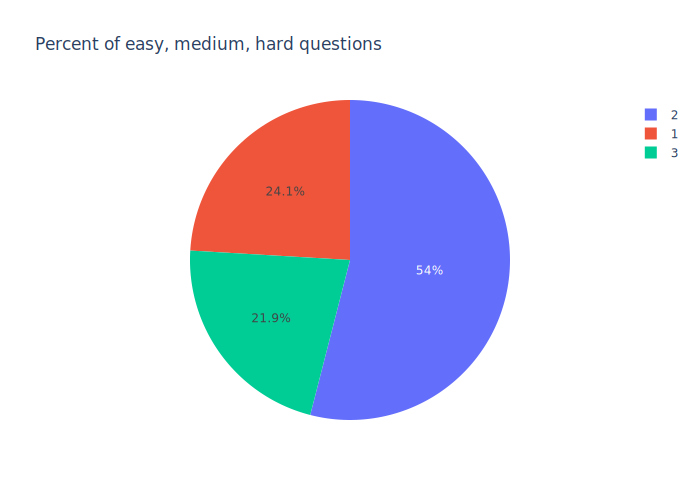

In [35]:
temp=df.difficulty.value_counts()
px.pie(temp,values=temp.values,names=temp.index,title='Percent of easy, medium, hard questions')

# 2. No of premium questions

In [36]:
#Changing bool to integer
#True -> 1
#False ->0
t=[]
for i in df.isPaid:
    if i:t.append(1)
    else:t.append(0)
df['isPaid']=t

In [37]:
#Counting number of premium and nonpremium questions
df['isPaid'].value_counts()

0    1393
1     257
Name: isPaid, dtype: int64

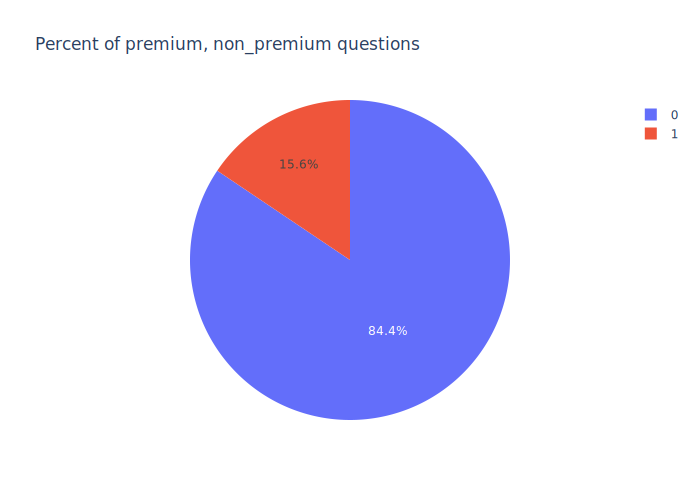

In [38]:
temp=df['isPaid'].value_counts()
px.pie(df,values=temp.values,names=temp.index,title='Percent of premium, non_premium questions')

In [39]:
print('easy questions')
print(df[df['difficulty']==1]['isPaid'].value_counts(normalize=True))
print('medium questions')
print(df[df['difficulty']==2]['isPaid'].value_counts(normalize=True))
print('hard questions')
print(df[df['difficulty']==3]['isPaid'].value_counts(normalize=True))

easy questions
0    0.891688
1    0.108312
Name: isPaid, dtype: float64
medium questions
0    0.819304
1    0.180696
Name: isPaid, dtype: float64
hard questions
0    0.853591
1    0.146409
Name: isPaid, dtype: float64


Among medium questions, there is more percent of premium questions when compared to easy and hard, but the difference is not huge.

There are less percent of easy premium questions.

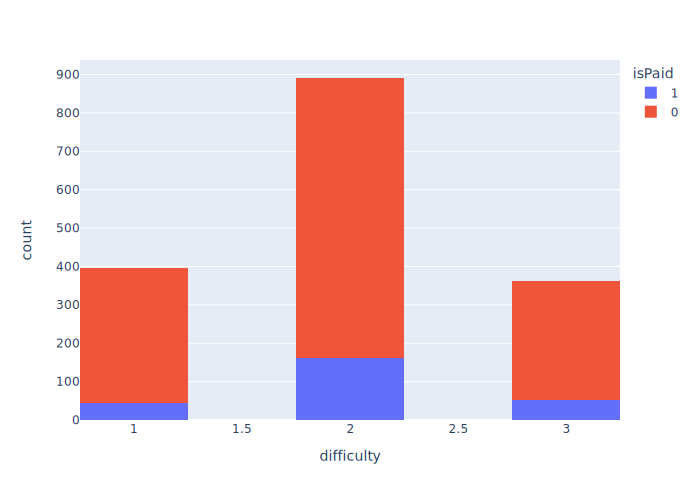

In [40]:
px.histogram(df,x='difficulty',color='isPaid',nbins=10)

# 3. Video solutions

In [41]:
df.video.value_counts(dropna=False)

False    914
NaN      701
True      35
Name: video, dtype: int64

We can observe that, there is lots of missing data in this column. Lets perform analysis by ignoring those missing values

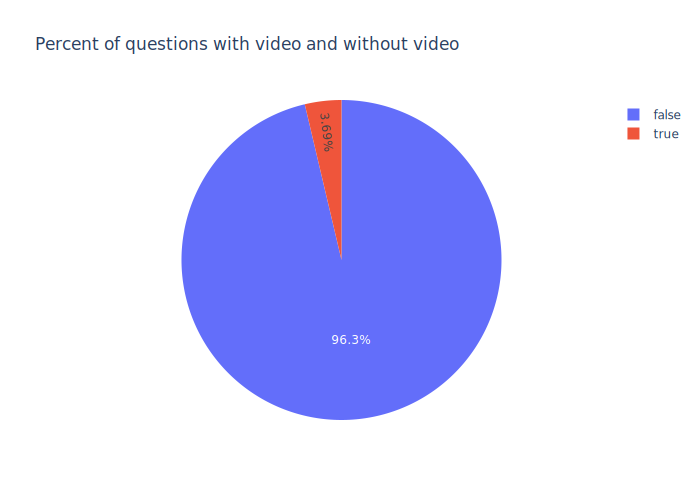

In [42]:
temp=df['video'].value_counts()
px.pie(df,values=temp.values,names=temp.index,title='Percent of questions with video and without video')

We can observe that, there are only 3.6 percent of questions with video solutions.

In [43]:
print('premium questions')
print(df[df['isPaid']==1]['video'].value_counts(normalize=True))
print('non premium questions')
print(df[df['isPaid']==0]['video'].value_counts(normalize=True))

premium questions
False    0.895105
True     0.104895
Name: video, dtype: float64
non premium questions
False    0.975186
True     0.024814
Name: video, dtype: float64


We can see that more percent of premium questions have video solutions when compared to non premium questions (10% vs 2%)

### But this doesn't matter because we can watch video only if we unlock premium. 
So for non premium questions, even video solution is present, non premium users will not have access to video.

# 4. Submissions and Acceptance

### Top 20 Questions with more number of submissions. 
This means they must be more popular questions

In [44]:
#Creating a temperory dataframe with required columns and sorting accorting to total submitted
temp=df[['question_id','title','total Submitted']].sort_values(by='total Submitted',ascending=False).reset_index().head(20)
temp

,index,question_id,title,total Submitted
0,1649,1,Two Sum,8694951
1,1647,3,Longest Substring Without Repeating Characters,6682902
2,1643,7,Reverse Integer,5647047
3,1648,2,Add Two Numbers,5224494
4,1642,8,String to Integer (atoi),4547888
5,1635,15,3Sum,4427735
6,1645,5,Longest Palindromic Substring,4108381
7,1630,20,Valid Parentheses,3426042
8,1552,98,Validate Binary Search Tree,3279645
9,1624,26,Remove Duplicates from Sorted Array,2934248


Above are the top 20 questions with more number of submissions

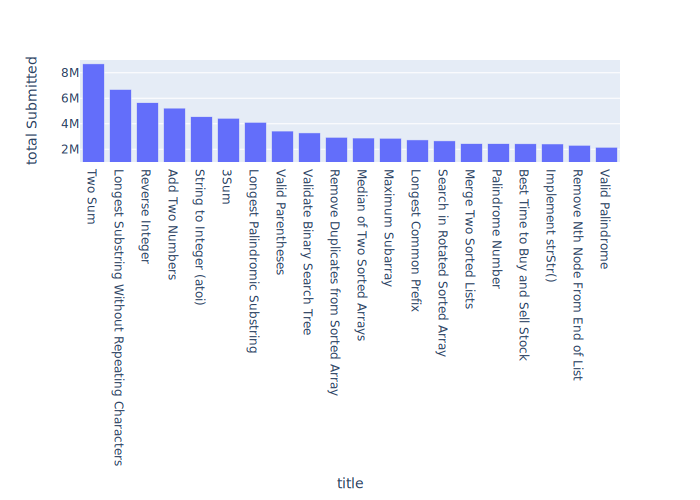

In [45]:
px.bar(temp,x='title',y='total Submitted',range_y=[1000000,9000000])

Not only submissions, we should also consider acceptance rate
Lets find top 20 question with more acceptance/submissions ratio

In [46]:
#Adding acceptance/submissions column to dataframe
df['acc_sub_ratio']=(df['total Accepted']/df['total Submitted'])*100

In [47]:
#Creating a temporary table with required column and sorting according to acc sub ratio
temp=df[['question_id','title','total Submitted','total Accepted','difficulty','acc_sub_ratio']].sort_values('acc_sub_ratio',ascending=False)
temp['question_id']=temp['question_id'].apply(str)
temp.head(20)

,question_id,title,total Submitted,total Accepted,difficulty,acc_sub_ratio
427,1404,Print Immutable Linked List in Reverse,25230,23790,2,94.292509
188,1713,Dot Product of Two Sparse Vectors,39106,35694,2,91.274996
649,1089,Remove Vowels from a String,70819,64124,1,90.546322
281,1603,Running Sum of 1d Array,323746,287068,1,88.670748
557,1205,Defanging an IP Address,336414,297302,1,88.373849
121,1791,Richest Customer Wealth,104538,92205,1,88.202376
332,1528,Kids With the Greatest Number of Candies,223831,197377,1,88.181262
289,1580,Shuffle the Array,211271,186267,1,88.164963
295,1572,Subrectangle Queries,44719,39364,2,88.025224
255,1635,Number of Good Pairs,178288,156334,1,87.686216


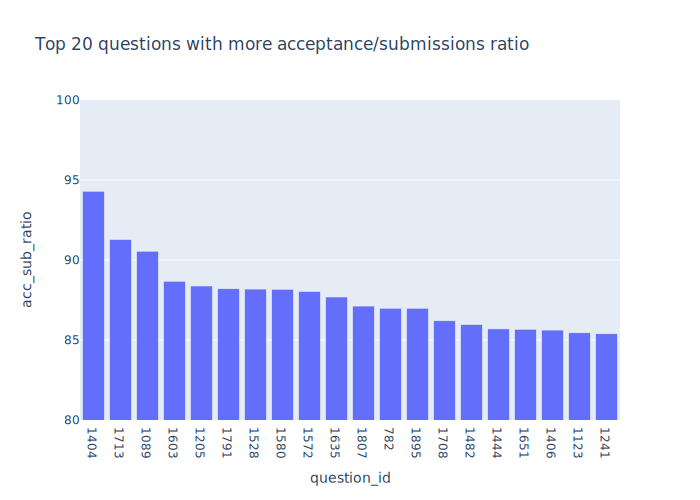

In [48]:
px.bar(temp.head(20),x='question_id',y='acc_sub_ratio',hover_data=['title'],range_y=[80,100],title='Top 20 questions with more acceptance/submissions ratio')

Above are the top 20 questions with highest acc_sub_ratio

### Acceptance submissions ratio according to difficulty of problem

Grouping according to difficulty and performing aggregate functions

In [49]:
df.groupby('difficulty').acc_sub_ratio.agg(['mean','max','min'])

,mean,max,min
difficulty,,,
1,59.424512,90.546322,25.943861
2,51.656386,94.292509,15.714723
3,43.899945,76.985656,13.929138


### From above, we can say that hard questions have less average ratio when compared to easy and medium. Ratio decreases as difficulty of questions increases
### When we observe max column in above, medium question has high maximum value than easy question :)

# 5. Easy Hard questions
Hard Questions with highest acc_sub_ratio

In [50]:
df[df['difficulty']==3][['question_id','title','acc_sub_ratio']].sort_values('acc_sub_ratio',ascending=False)[:5]

,question_id,title,acc_sub_ratio
716,1022,Unique Paths III,76.985656
955,771,Encode N-ary Tree to Binary Tree,74.877427
868,865,Robot Room Cleaner,72.854986
351,1503,Reducing Dishes,72.110799
677,1061,Number of Valid Subarrays,72.076409


Above are 5 Hard questions which are easy to solve when compared to other hard problems

# 6. Hard questions among easy and medium tag problems

Questions with easy or medium difficulty tag and has less acc_sub_ratio

In [51]:
df[df['difficulty']!=3][['question_id','title','difficulty','acc_sub_ratio']].sort_values('acc_sub_ratio')[:50]

,question_id,title,difficulty,acc_sub_ratio
1642,8,String to Integer (atoi),2,15.714723
1621,29,Divide Two Integers,2,16.940987
1050,665,Non-decreasing Array,2,19.846150
1446,220,Contains Duplicate III,2,21.358832
1484,166,Fraction to Recurring Decimal,2,22.400950
1379,288,Unique Word Abbreviation,2,23.208138
1229,444,Sequence Reconstruction,2,23.644418
1499,151,Reverse Words in a String,2,24.092925
275,1612,Avoid Flood in The City,2,24.600721
1156,523,Continuous Subarray Sum,2,24.781377


### Above are top 30 questions with easy or medium tag but difficult to solve

### We can observe that not all hard questions are hard. 
### In the same way, there are many problem with medium tag but are difficult to solve as they have less acceptance/submissions ratio. (I considered if the ratio is less than 30%, then it is difficult to solve.)

# Summary and Insights

1. There are about 55% medium questions, 12% easy questions, 33% hard questions. 
2. Among medium questions, there is more percent of premium questions when compared to easy and hard, but the difference is not huge.There is less percent of easy premium questions.
3. More percent of premium questions have video solution. 
4. Hard questions have less acc_sub_ratio
5. There are many problem with medium tag but are difficult to solve as they have less acceptance/submissions ratio. (I considered if the ratio is less than 30%, then it is difficult to solve.)